# 12. Exploratory Analysis & Linear Regression


## 12.1 Load ML Features Dataset


In [1]:
import pandas as pd

feature_dataset_path = r"C:\Users\pc\data science\SADOP\data\ml_features.csv"
df = pd.read_csv(feature_dataset_path)
df.head()


,query,query_time,rows_examined,joins,has_sum,has_group_by,has_where,tables_count,query_length,cpu_usage,memory_usage,is_slow
0,SUM transactions (simulated missing index),0.115103,250188,1,1,1,0,2,42,11.3,190.453125,1
1,SUM transactions (simulated missing index),0.082442,250188,1,1,1,0,2,42,0.0,190.453125,1
2,SUM transactions (simulated missing index),0.083628,250188,1,1,1,0,2,42,0.0,190.453125,1
3,SUM transactions for user_id=141,0.027882,15,2,1,1,1,3,32,0.0,190.453125,0
4,SUM transactions for user_id=141,0.024800,15,2,1,1,1,3,32,0.0,190.453125,0


## 12.2 Quick Summary Statistics


In [2]:
df.describe()
df['is_slow'].value_counts(normalize=True)


is_slow
0    0.684952
1    0.315048
Name: proportion, dtype: float64

## 12.3 Visualize Feature Distributions


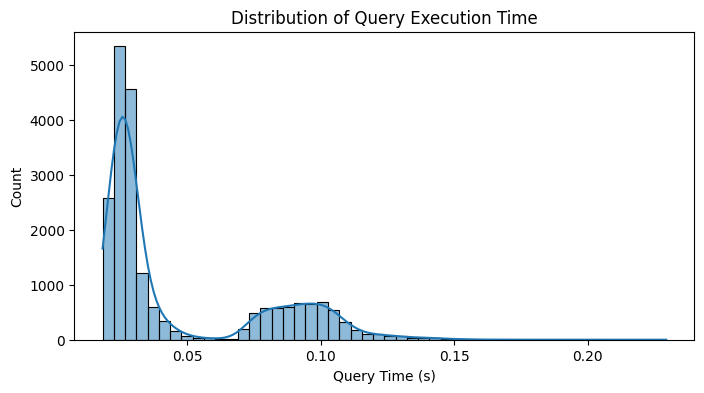

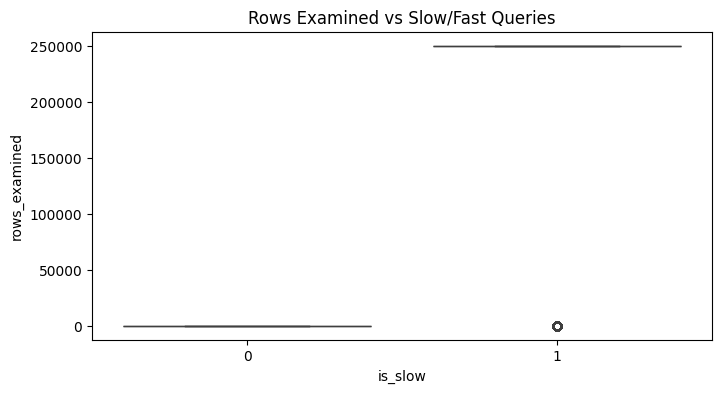

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of query_time
plt.figure(figsize=(8,4))
sns.histplot(df['query_time'], bins=50, kde=True)
plt.title('Distribution of Query Execution Time')
plt.xlabel('Query Time (s)')
plt.ylabel('Count')
plt.show()

# Boxplot of rows_examined by slow/fast
plt.figure(figsize=(8,4))
sns.boxplot(x='is_slow', y='rows_examined', data=df)
plt.title('Rows Examined vs Slow/Fast Queries')
plt.show()


## 12.4 Linear Regression: Predict query_time


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features (numeric only)
X = df[['rows_examined', 'joins', 'tables_count', 'query_length', 'has_sum', 'has_group_by', 'has_where', 'cpu_usage', 'memory_usage']]
y = df['query_time']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2:.3f}')

# Coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
coef_df.sort_values(by='coefficient', ascending=False)


R² score: 0.905


,feature,coefficient
4,has_sum,4.996004e-16
5,has_group_by,0.000000e+00
7,cpu_usage,-7.792345e-06
0,rows_examined,-1.278854e-05
3,query_length,-3.191772e-05
8,memory_usage,-8.874625e-05
1,joins,-1.088939e+00
6,has_where,-1.088939e+00
2,tables_count,-1.088939e+00


## 12.5 Interpretation